In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('laptop_data.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [5]:
df['Ram'] = df['Ram'].str.replace('GB','').astype('int')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float')

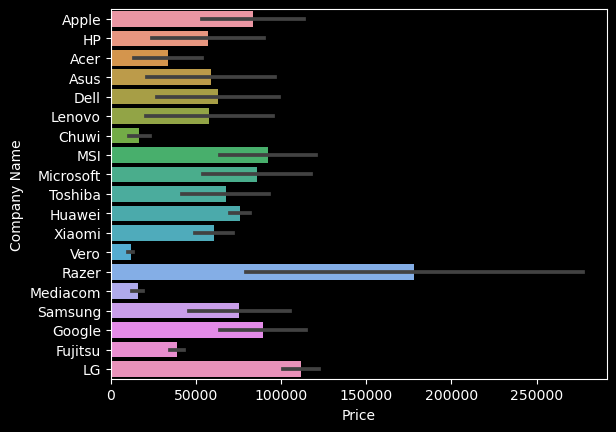

In [6]:
sns.barplot(data = df , y = df['Company'] , x = df['Price'],orient='horizontal',errorbar='sd')
plt.ylabel('Company Name')
plt.xlabel('Price')
plt.xticks()
plt.show()

### Cleaning And Feature Extraction on ScreenResolution Column

In [7]:
def extract_resolution(x):
    return re.findall(r'\d\d+',x)

In [8]:
res = df['ScreenResolution'].apply(lambda x: extract_resolution(x))

In [9]:
df['Res_x'] = res.apply(lambda x : x[0]).astype('int')
df['Res_y'] = res.apply(lambda x : x[1]).astype('int')

In [10]:
df['ppi'] = ((df['Res_x']**2 + df['Res_y']**2)**0.5)/df['Inches']

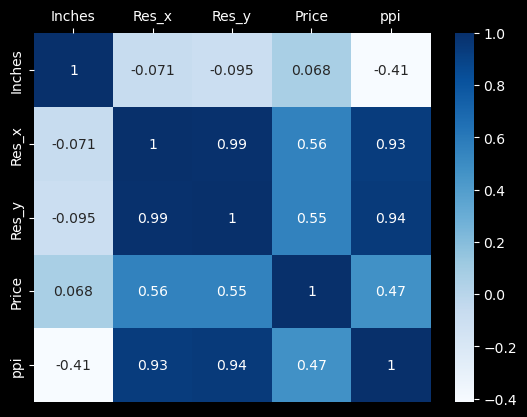

In [11]:
ax = sns.heatmap(df[['Inches','Res_x','Res_y','Price','ppi']].corr(),annot=True,cmap='Blues')
ax.xaxis.tick_top()

In [12]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [13]:
df = df.drop(columns=['Inches','ScreenResolution','Res_x','Res_y'])

In [14]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,Ips
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,0,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,0,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,0,1


### Cleaning and Feature Extraction in Cpu Column

In [15]:
cpu = df['Cpu'].apply(lambda x: x.split()[0:3])
cpu

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [16]:
df['Cpu_name'] = cpu.apply(lambda x : ' '.join(x))

In [17]:
def cpu_brand(x):
    if x == 'Intel Core i7' or x == 'Intel Core i5' or x == 'Intel Core i3':
        return x
    else:
        if x.split()[0] == 'Intel':
            return 'Other Intel'
        else:
            return 'AMD'
            

In [18]:
df['Cpu_brand'] = df['Cpu_name'].apply(lambda x : cpu_brand(x))

In [19]:
clock_speed = df['Cpu'].apply(lambda x: x.split()[-1])

In [20]:
df['Clock_speed'] = clock_speed.str.replace('GHz' ,'').astype('float')

In [21]:
df = df.drop(columns=['Cpu','Cpu_name'])

In [22]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,Ips,Cpu_brand,Clock_speed
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,0,1,Intel Core i5,2.3
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,0,1,Intel Core i7,2.7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,0,1,Intel Core i5,3.1


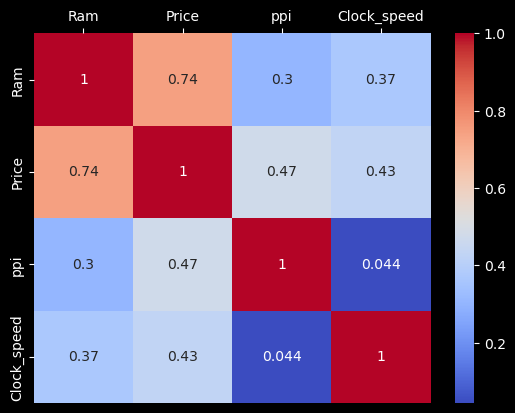

In [23]:
ax = sns.heatmap(df[['Ram','Price','ppi','Clock_speed']].corr(),annot=True,cmap='coolwarm')
ax.xaxis.tick_top()

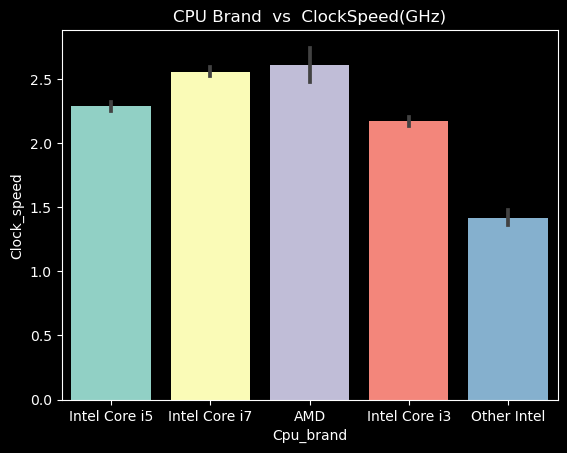

In [24]:
sns.barplot(data =df ,x =df['Cpu_brand'] ,y=df['Clock_speed'],saturation=0.9)
plt.title('CPU Brand  vs  ClockSpeed(GHz)')
plt.show()

#### CLeaning and Feature Extraction of OpSys(Operating System)  Column

In [25]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [26]:
def operatng_sys(x):
    if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    else:
        if x == 'macOS' or x == 'Mac OS X':
            return 'MacOS'
        else:
            return 'Other'

In [27]:
df['OpSys'] = df['OpSys'].apply(lambda x : operatng_sys(x))


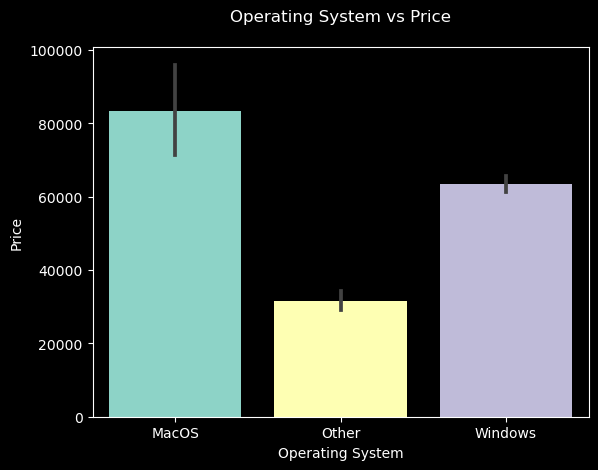

In [28]:
sns.barplot(data = df , x = df['OpSys'] , y =df['Price'],saturation=1)
plt.title('Operating System vs Price\n')
plt.xlabel('Operating System')
plt.show()

### Cleaning and Feature Extraction of Gpu Column

In [29]:
df['Gpu'] = df['Gpu'].apply(lambda x : x.split()[0])

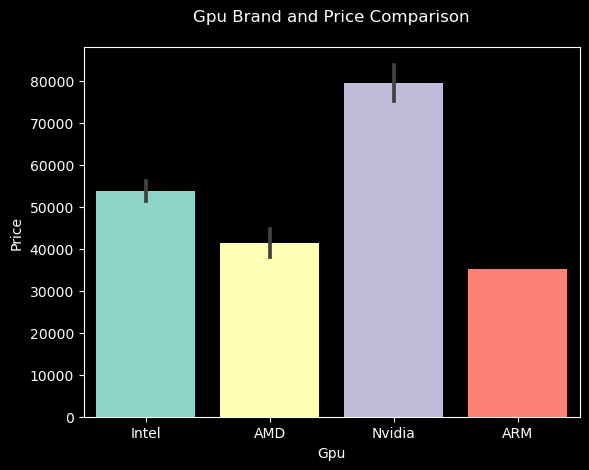

In [30]:
sns.barplot(data =df ,x = df['Gpu'],y=df['Price'],saturation=1)
plt.title('Gpu Brand and Price Comparison\n')
plt.show()

### CLeaning And Feature Extraction of Memory Column

In [31]:
df['SSD'] = df['Memory'].apply(lambda x: 1 if 'SSD' in x else 0)
df['HDD'] = df['Memory'].apply(lambda x: 1 if 'HDD' in x else 0)

In [32]:
df['Memory'] = df['Memory'].str.replace(r'1.0','1',regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')

In [33]:
def memory_extraction(x):
    return re.findall(r'\d\d+',x)

In [34]:
memory = df['Memory'].apply(lambda x: memory_extraction(x))

In [35]:
def ssd_extraction(x):
    if len(x) == 1:
        return x[0]

In [36]:
def ssd1_extraction(x):
    if len(x) == 2:
        return x[0]

In [37]:
def hdd_extraction(x):
    if len(x) == 2:
        return x[1]

In [38]:
df['ssd'] = memory.apply(lambda x: ssd_extraction(x))
df['ssd1'] = memory.apply(lambda x: ssd1_extraction(x))
df['hdd'] = memory.apply(lambda x: hdd_extraction(x))

In [39]:
df['final_ssd'] = df['SSD'] * df['ssd']
df['final_hdd'] = df['HDD'] * df['ssd']

In [40]:
df['final_ssd'] = df['final_ssd'].fillna(0)
df['final_hdd'] = df['final_hdd'].fillna(0)

In [41]:
df['ssd1'] = df['ssd1'].apply(lambda x: 0 if x == None else x)
df['hdd'] = df['hdd'].apply(lambda x: 0 if x == None else x)

In [42]:
df['final_hdd'] = df['final_hdd'].apply(lambda x: 0 if x == None else x)
df['final_ssd'] = df['final_ssd'].apply(lambda x: 0 if x == None else x)

In [43]:
df['final_ssd'] = df['final_ssd'].replace('',0)
df['final_hdd'] = df['final_hdd'].replace('',0)

In [44]:
df['final_ssd'] = pd.to_numeric(df['final_ssd'])
df['final_hdd'] = pd.to_numeric(df['final_hdd'])

In [45]:
df['ssd1'] = pd.to_numeric(df['ssd1'])
df['hdd'] = pd.to_numeric(df['hdd'])

In [46]:
df['SSD_Storage'] = df['final_ssd'] + df['ssd1']
df['HDD_Storage'] = df['final_hdd'] + df['hdd']

In [47]:
df = df.drop(columns=['Memory','ssd','ssd1','hdd','final_ssd','final_hdd'])

In [48]:
numeric_df = df[['Ram','Weight','ppi','Touchscreen','Ips','Clock_speed','SSD_Storage','HDD_Storage','Price']]

In [49]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,Touchscreen,Ips,Cpu_brand,Clock_speed,SSD,HDD,SSD_Storage,HDD_Storage
0,Apple,Ultrabook,8,Intel,MacOS,1.37,71378.6832,226.983005,0,1,Intel Core i5,2.3,1,0,128,0
1,Apple,Ultrabook,8,Intel,MacOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0,0,0,0
2,HP,Notebook,8,Intel,Other,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5,1,0,256,0
3,Apple,Ultrabook,16,AMD,MacOS,1.83,135195.3360,220.534624,0,1,Intel Core i7,2.7,1,0,512,0
4,Apple,Ultrabook,8,Intel,MacOS,1.37,96095.8080,226.983005,0,1,Intel Core i5,3.1,1,0,256,0


In [50]:
numeric_df.corr()

,Ram,Weight,ppi,Touchscreen,Ips,Clock_speed,SSD_Storage,HDD_Storage,Price
Ram,1.000000,0.383874,0.303763,0.116984,0.206623,0.368000,0.596958,0.109358,0.743007
Weight,0.383874,1.000000,-0.323240,-0.294620,0.016967,0.320434,-0.058802,0.527295,0.210370
ppi,0.303763,-0.323240,1.000000,0.460587,0.300879,0.043541,0.507058,-0.297534,0.473487
Touchscreen,0.116984,-0.294620,0.460587,1.000000,0.150512,-0.082579,0.251781,-0.209731,0.191226
Ips,0.206623,0.016967,0.300879,0.150512,1.000000,0.063035,0.221585,-0.089415,0.252208
Clock_speed,0.368000,0.320434,0.043541,-0.082579,0.063035,1.000000,0.261222,0.130643,0.430293
SSD_Storage,0.596958,-0.058802,0.507058,0.251781,0.221585,0.261222,1.000000,-0.383158,0.667761
HDD_Storage,0.109358,0.527295,-0.297534,-0.209731,-0.089415,0.130643,-0.383158,1.000000,-0.086851
Price,0.743007,0.210370,0.473487,0.191226,0.252208,0.430293,0.667761,-0.086851,1.000000


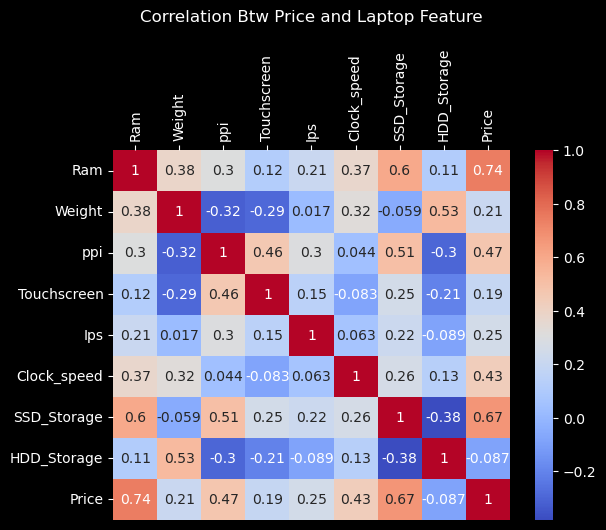

In [51]:
ax = sns.heatmap(numeric_df.corr(),cmap='coolwarm',annot=True)
ax.xaxis.tick_top()
plt.xticks(rotation = 90)
plt.title('Correlation Btw Price and Laptop Feature\n')
plt.show()

#### Since the distribution of price value is skewed let's c 

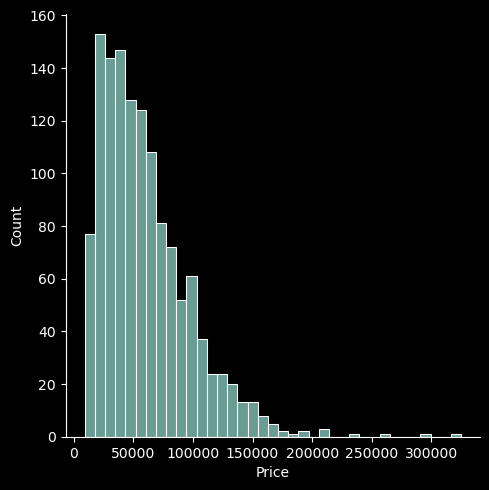

In [52]:
sns.displot(df['Price'])
plt.show()

#### And When we apply log transformer we get a normal distribution as shown below

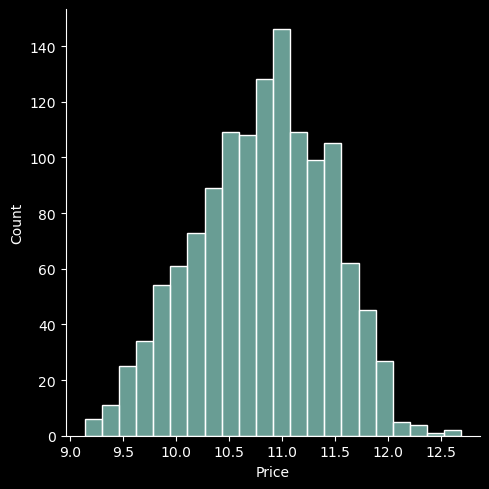

In [53]:
sns.displot(np.log(df['Price']))
plt.show()

#### So Further we proceed with normally ditributed  values of Price and also it is our dependent Variable

In [54]:
y = np.log(df['Price'])

In [55]:
X = df.drop(columns='Price')

In [56]:
X.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,ppi,Touchscreen,Ips,Cpu_brand,Clock_speed,SSD,HDD,SSD_Storage,HDD_Storage
0,Apple,Ultrabook,8,Intel,MacOS,1.37,226.983005,0,1,Intel Core i5,2.3,1,0,128,0
1,Apple,Ultrabook,8,Intel,MacOS,1.34,127.677940,0,0,Intel Core i5,1.8,0,0,0,0
2,HP,Notebook,8,Intel,Other,1.86,141.211998,0,0,Intel Core i5,2.5,1,0,256,0
3,Apple,Ultrabook,16,AMD,MacOS,1.83,220.534624,0,1,Intel Core i7,2.7,1,0,512,0
4,Apple,Ultrabook,8,Intel,MacOS,1.37,226.983005,0,1,Intel Core i5,3.1,1,0,256,0


In [57]:
import sklearn

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [59]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [60]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,Touchscreen,Ips,Cpu_brand,Clock_speed,SSD,HDD,SSD_Storage,HDD_Storage
0,Apple,Ultrabook,8,Intel,MacOS,1.37,71378.6832,226.983005,0,1,Intel Core i5,2.3,1,0,128,0
1,Apple,Ultrabook,8,Intel,MacOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0,0,0,0


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
X.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,ppi,Touchscreen,Ips,Cpu_brand,Clock_speed,SSD,HDD,SSD_Storage,HDD_Storage
0,Apple,Ultrabook,8,Intel,MacOS,1.37,226.983005,0,1,Intel Core i5,2.3,1,0,128,0
1,Apple,Ultrabook,8,Intel,MacOS,1.34,127.677940,0,0,Intel Core i5,1.8,0,0,0,0


#### Transformation

In [63]:
transformation = ColumnTransformer(transformers=[
    ('trans',OneHotEncoder(),[0,1,3,4,9,])
],remainder='passthrough')

In [64]:
X_train_transformed = transformation.fit_transform(X_train)

In [65]:
X_test_transformed = transformation.transform(X_test)

#### Random Forest Regressor

In [66]:
model = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42)

In [67]:
model.fit(X_train_transformed,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [68]:
y_pred = model.predict(X_test_transformed)

In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train_transformed,y_train,cv=10)
np.mean(score)

0.8785948742456121

In [70]:
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")

r2_score : 0.8675326412422688
Mean Absolute Error : 0.1643080486601895


#### XGboost

In [71]:
model_xgboost = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
model_xgboost.fit(X_train_transformed,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=45, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred = model_xgboost.predict(X_test_transformed)

In [73]:
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")

r2_score : 0.8780441330577933
Mean Absolute Error : 0.15086784340636042


In [74]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_xgboost, X_train_transformed,y_train,cv=10)
np.mean(score)

0.8861648087446714

In [75]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [45,50,100,150,None],'max_depth':[5,10,15,2,50],'learning_rate':[0.1,0.5,0.01]}
grid_search = GridSearchCV(estimator=model_xgboost,param_grid=parameters,n_jobs=-1,cv=10,verbose=0)

In [76]:
grid_search.fit(X_train_transformed,y_train)
grid_search.best_params_

{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 150}

#### After Grid Search CV (XGBRegressor)

In [77]:
model_xgboost = XGBRegressor(n_estimators=150,max_depth=2,learning_rate=0.5)
model_xgboost.fit(X_train_transformed,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
y_pred = model_xgboost.predict(X_test_transformed)
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")

r2_score : 0.8798868825773869
Mean Absolute Error : 0.15151900877184377


#### After Grid Search CV (Random Forest)

In [79]:
parameters = {'n_estimators' : [45,50,100,150,200,250,300],'max_depth':[5,10,15,20]}
grid_search = GridSearchCV(estimator=model,param_grid=parameters,n_jobs=-1,cv=10,verbose=1)
grid_search.fit(X_train_transformed,y_train)
grid_search.best_params_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


{'max_depth': 20, 'n_estimators': 300}

In [80]:
model = RandomForestRegressor(n_estimators=300,max_depth=20,random_state=42)
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
print(f"r2_score : {r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")

r2_score : 0.871234103697193
Mean Absolute Error : 0.1579828122235139


In [81]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,Touchscreen,Ips,Cpu_brand,Clock_speed,SSD,HDD,SSD_Storage,HDD_Storage
0,Apple,Ultrabook,8,Intel,MacOS,1.37,71378.6832,226.983005,0,1,Intel Core i5,2.3,1,0,128,0
1,Apple,Ultrabook,8,Intel,MacOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0,0,0,0


In [82]:
data = [['HP','Notebook',8,'Nvidia','Windows',2.32,141.211,0,0,'AMD',3.3,1,0,512,0]]
columns = ['Company','TypeName','Ram','Gpu','OpSys','Weight','ppi','Touchscreen','Ips','Cpu_brand','Clock_speed','SSD','HDD',
           'SSD_Storage','HDD_Storage']

In [89]:
sample_test_data = pd.DataFrame(data=data, columns=columns)
sample_test_transformed = transformation.transform(sample_test_data)
y_pred_sample = model_xgboost.predict(sample_test_transformed)

In [90]:
y_pred_sample

array([11.058749], dtype=float32)

In [91]:
np.exp(11.19515822)

72777.21613337094

#### As Sample laptop data is randomly selected from flipkart and it's Real Value is 70,822 and our model predicted 72,777 with real  margin error of 2.76%

In [96]:
percent_error = ((72777-70822)/70822) *100
percent_error

2.7604416706673067